#Installing and Importing Libraries

1.    Keras Tuner (Hyperparameter tuning)
2.    Tensorflow, sklearn, NLTK, pandas, numpy,  matplotlib, seaborn, wordcloud,etc (NLP, Data manipulations, Data Visualizing)




In [1]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [29]:
import tensorflow as tf
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Load Dataset

fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_df.shape

(23481, 4)

In [6]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real_df.shape

(21417, 4)

#Data Preprocessing

Menggunakan prinsip Garbage in Garbage Out

In [8]:
#Adding labels to the datasets

fake_df['label'] = 1  # Fake news
real_df['label'] = 0  # Real news

In [9]:
#Combining the datasets as one

df = pd.concat([fake_df, real_df], ignore_index=True)

df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
#Total Data
df.shape

(44898, 5)

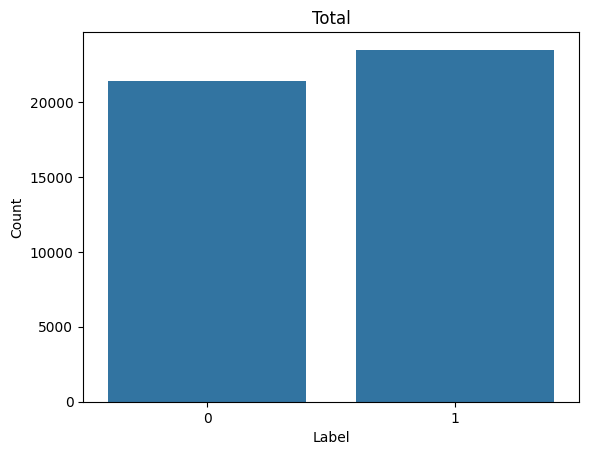

In [11]:
sns.countplot(x='label', data=df)
plt.title('Total')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
#Dropping the Title, Subject, Date Columns (Irrelevant)
data = df.drop(["title", "subject","date"], axis = 1)
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [13]:
#Check for Null Values

data.isnull().sum()

,0
text,0
label,0


In [14]:
# Shuffling data
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [15]:
# Text preprocessing function (Deleting irrelevant words, symbols, numbers)

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


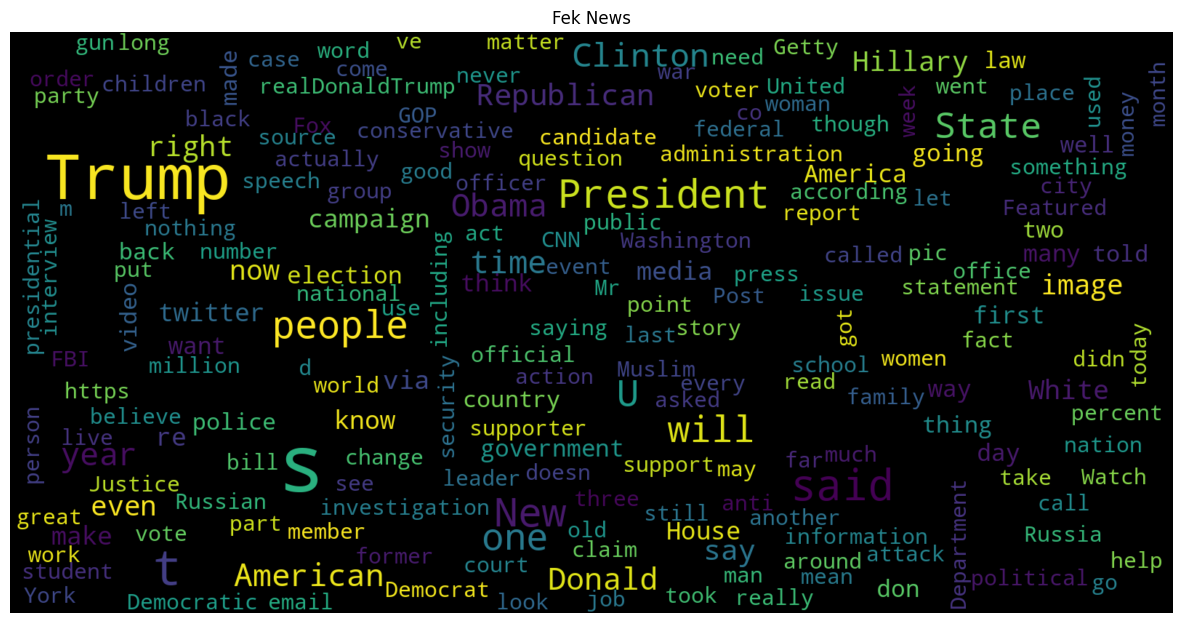

In [16]:
#Visualising WordCloud (to get a visual look of the data)


consolidated = ' '.join(
    word for word in data['text'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Fek News')
plt.show()

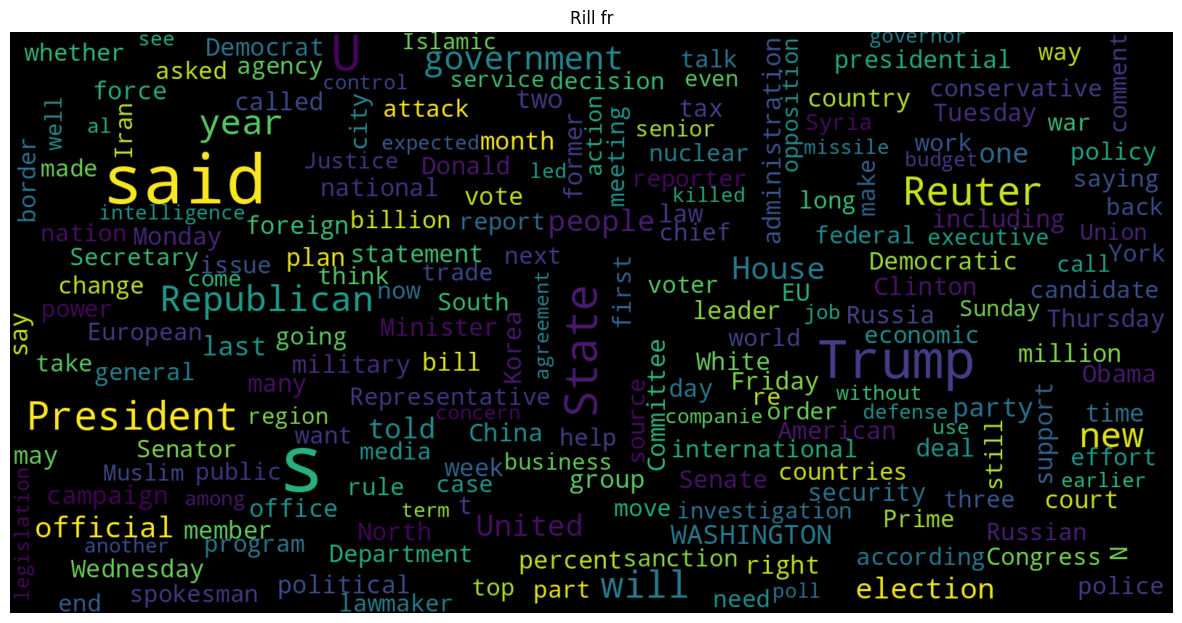

In [17]:
#Real News

consolidated = ' '.join(
    word for word in data['text'][data['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Rill fr')
plt.show()

In [18]:
#Train Test Split, 80 Training : 20  Testing

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract text and labels
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

#Feature Engineering

Process of selecting, transforming, or creating new features from raw data (Above) to improve the performance of machine learning models.

Using Tokenization, for example we have the word "binus university gaming" using tokenization it will be "binus"m "university" "gaming"


In [19]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Use top 10,000 words
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to the same length
max_len = 128  # Maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#Model Training

We'll be using 2 models then comparing it with highest accuracy, the models are

1.   LSTM (DL RNN)
2.   Logistic Regression (Supervised ML)
3.   Decision Tree (Supervised ML)



In [20]:
#LSTM

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),   #Input Layer
    LSTM(128, return_sequences=False),  #Hidden Layer
    Dropout(0.5),  #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    Dense(64, activation='relu'),  #Hidden Layer
    Dropout(0.5),   #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    Dense(1, activation='sigmoid')   #Output Layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #Adam optimizer because its common, binary crossentropy because of the outcome will 1 or 0 (real or fake)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
#LSTM Training

history = model.fit(
    train_sequences, train_labels,
    validation_data=(test_sequences, test_labels),
    epochs=5,  #5 times
    batch_size=64
)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8348 - loss: 0.3276 - val_accuracy: 0.9690 - val_loss: 0.1337
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9312 - loss: 0.2327 - val_accuracy: 0.8882 - val_loss: 0.3255
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9101 - loss: 0.2465 - val_accuracy: 0.9616 - val_loss: 0.1404
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9634 - loss: 0.1391 - val_accuracy: 0.9735 - val_loss: 0.0842
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9836 - loss: 0.0623 - val_accuracy: 0.9927 - val_loss: 0.0374


In [28]:
# Logistic Regression

train_sequences_flat = train_sequences.reshape(train_sequences.shape[0], -1)
test_sequences_flat = test_sequences.reshape(test_sequences.shape[0], -1)

log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
log_reg.fit(train_sequences_flat, train_labels)

log_reg_pred = log_reg.predict(test_sequences_flat)

In [31]:
# DEcision tree
dtree = DecisionTreeClassifier(max_depth=10, random_state=42)
dtree.fit(train_sequences_flat, train_labels)

dtree_pred = dtree.predict(test_sequences_flat)

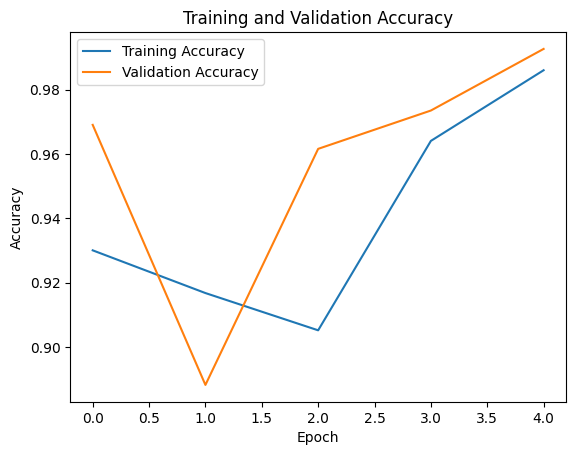

In [32]:
#LSTM, Good Training and Validation = Chart goes Up

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

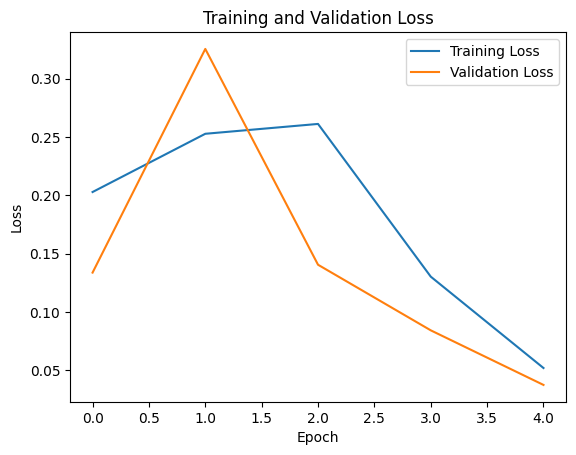

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Hyperparameter Tuning
Process of Tweaking the LSTM Model Architecture and finding the best model

In [34]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=hp.Int('embedding_dim', min_value=64, max_value=256, step=64), input_length=max_len)) #Input Layer
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=False)) #Hidden Layer
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)))  #Hidden Layer Dropout Layer (Shutting downs the neurons)
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')) #Hidden Layer
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1))) #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    model.add(Dense(1, activation='sigmoid')) #Output Layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # 5 times to find the best model
    directory='tuner_results',
    project_name='fake_news_lstm'
)

# Perform hyperparameter tuning
tuner.search(train_sequences, train_labels, epochs=3, validation_data=(test_sequences, test_labels))

# Get the best model, after finding the best model with the highest accuracy, this will get it
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(train_sequences, train_labels, epochs=5, validation_data=(test_sequences, test_labels), batch_size=64)

Trial 5 Complete [00h 01m 00s]
val_accuracy: 0.9738307595252991

Best val_accuracy So Far: 0.9992204904556274
Total elapsed time: 00h 04m 41s
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9989 - loss: 0.0084 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 0.9974 - val_loss: 0.0186
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9985 - loss: 0.0125 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9992 - val_loss: 0.0060


#Model Evaluation and Predicting

How Accurate is the model?



In [38]:
loss, accuracy = best_model.evaluate(test_sequences, test_labels)

print(f"LSTM Model Accuracy: {accuracy}")

print("Logistic Regression Accuracy:", accuracy_score(test_labels, log_reg_pred))

print("Decision Tree Accuracy:", accuracy_score(test_labels, dtree_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9988 - loss: 0.0081
LSTM Model Accuracy: 0.9992204904556274
Logistic Regression Accuracy: 0.6634743875278396
Decision Tree Accuracy: 0.9930957683741648


Why's Logistic Regression performs so low?

Hypothesis: in NLP the data is usually a non linear relationship, whereas Logistic Regression is usually used for a linear relationship dataset (like Linear Regeression)

In [53]:
#LSTM Predict

def predict(text):
    # Preprocess the text
    text = preprocess_text(text)
    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    # Make prediction
    prediction = model.predict(padded_sequence)
    print(f"Raw prediction value: {prediction}")  # Check the probability value
    return "Fake" if prediction > 0.5 else "Real"


# Test the function
text = "(Reuters) - A gift-wrapped package addressed to U.S. Treasury Secretary Steven Mnuchinâ€™s home in a posh Los Angeles neighborhood that was suspected of being a bomb was instead filled with horse manure, police told local media. The package was found Saturday evening in a next-door neighborâ€™s driveway in Bel Air, the Los Angeles Police Department told the Los Angeles Times and KNBC television, the NBC affiliate in Los Angeles. The package also included a Christmas card with negative comments about President Donald Trump and the new U.S. tax law signed by Trump last week. Reuters could not reach LAPD officials for comment on Sunday. An LAPD bomb squad X-rayed the package before opening it and found the horse manure inside, police told local media. Aerial footage from KNBC showed officers investigating a large box in wrapping paper, then dumping a large amount of what they later identified as the manure and opening the card that was included inside.  Mnuchin, who KNBC said was not home when the package was discovered, is a former Goldman Sachs Group Inc executive and Hollywood film financier. A road in Bel Air was closed for about two hours, KNBC reported. The U.S. Secret Service is also investigating the incident, according to the TV station. "
result = predict(text)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction value: [[0.00174239]]
Prediction: Real
